## Extramarital Affairs Dataset

The dataset is affairs dataset and comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

#### Description of Variables
The dataset contains 6366 observations of 9 variables:
<ol>
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children
    
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
    
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
    
occupation_husb: husband's occupation (same coding as above)
    
affairs: time spent in extra-marital affairs
  </ol>  
#### Problem Statement

We treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and try to predict the classification for each woman.

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score


In [111]:
dta = sm.datasets.fair.load_pandas().data
dta.head(10)
dta.to_csv("affairs.csv")

In [112]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [114]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [116]:
dta['children'].unique()

array([3. , 0. , 4. , 1. , 5.5, 2. ])

In [117]:
dta['children']=dta['children'].replace(to_replace =5.5, 
                 value =5.0)

In [118]:
dta['children']=pd.to_numeric(dta['children'], downcast='signed')

In [119]:
dta['children'].unique()

array([3, 0, 4, 1, 5, 2], dtype=int8)

In [75]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.380930,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.389855,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.000000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


there is no null value in the dataset

In [76]:
import seaborn as sns

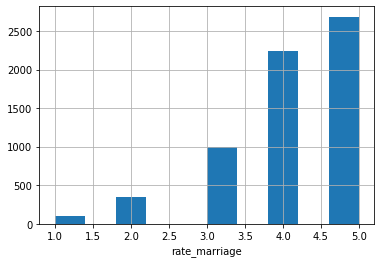

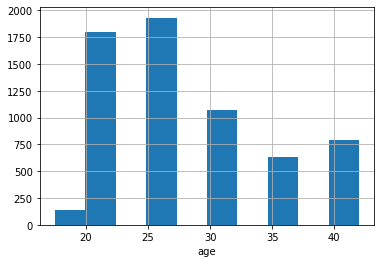

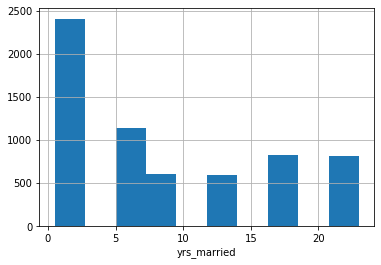

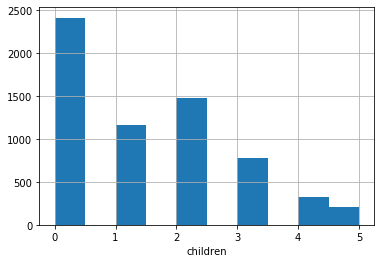

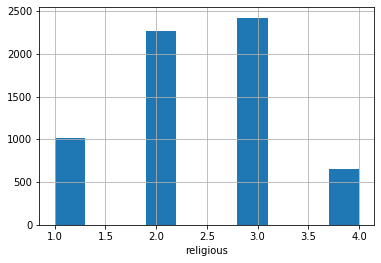

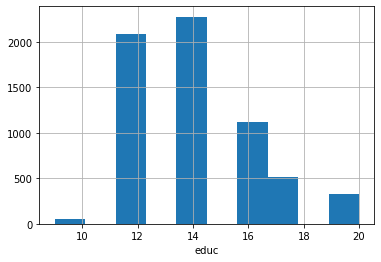

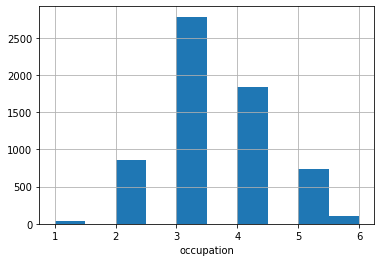

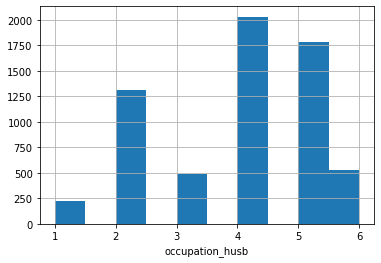

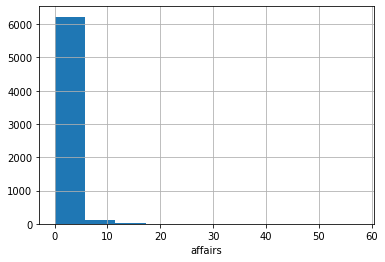

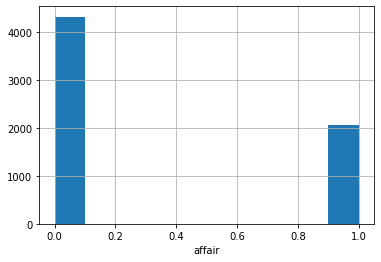

In [77]:

for i in dta.columns:
    dta[i].hist()
    plt.xlabel(i)
    plt.show()

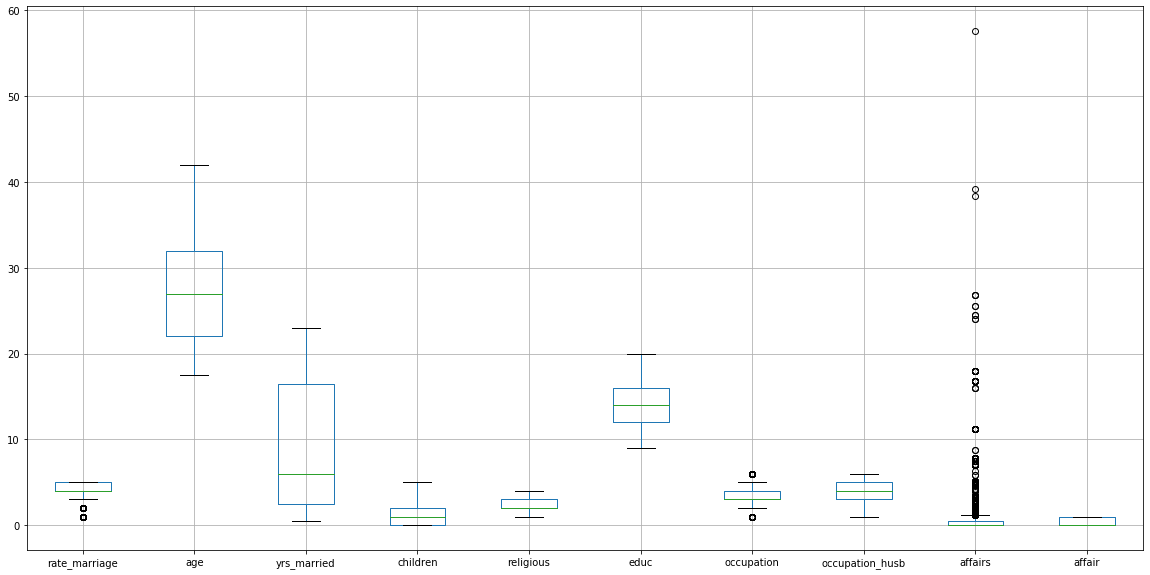

In [78]:
plt.figure(figsize=(20,10))
dta.boxplot()

In [79]:
def iqr(dta,col):
    sorted(dta[col])
    quatile1,quatile3 = np.percentile(dta[col],[25,75])
    iqr_value = quatile3 - quatile1
    lower_bound = quatile1 - (1.5*iqr_value)
    upper_bound = quatile3 + (1.5*iqr_value)
    print(" {} --> Upper bound {} and Lower bound {}".format(col,upper_bound,lower_bound))

    dta[col]=np.where(dta[col]>upper_bound,upper_bound,dta[col])
    dta[col]=np.where(dta[col]<lower_bound,lower_bound,dta[col])

In [80]:
iqr(dta,'rate_marriage')

 rate_marriage --> Upper bound 6.5 and Lower bound 2.5


In [81]:
iqr(dta,'occupation')

 occupation --> Upper bound 5.5 and Lower bound 1.5


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
y = dta['affair']
X =dta.drop(columns = ['affair','affairs'])

AxesSubplot(0.125,0.125;0.775x0.755)


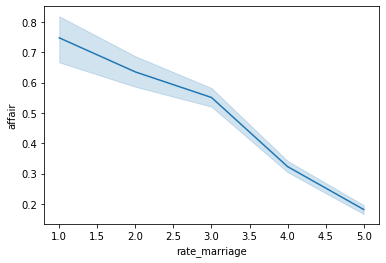

In [133]:

print(sns.lineplot(x=dta['rate_marriage'], y=dta['affair'], data=dta))
    

As the rating of marriage increase the affair decrease

AxesSubplot(0.125,0.125;0.775x0.755)


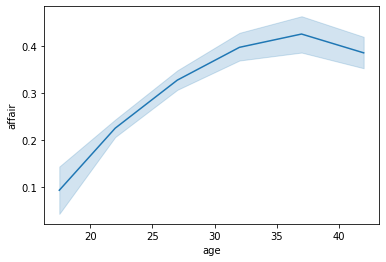

In [135]:
print(sns.lineplot(x='age', y='affair', data=dta))

As observe in power bi, affairs continuous increase at the age of 27 and then decrease

AxesSubplot(0.125,0.125;0.775x0.755)


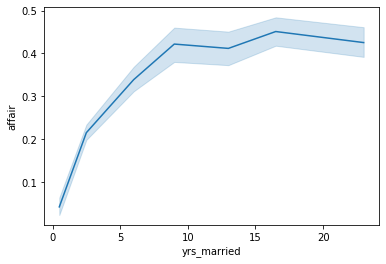

In [138]:
print(sns.lineplot(x='yrs_married', y='affair', data=dta))

As observe in power bi, affair increase till 2 child

As observe in power bi, women which as higher education has low affair



In [91]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [93]:
vif

,VIF,Features
0,1.033669,rate_marriage
1,5.454414,age
2,7.224749,yrs_married
3,2.588356,children
4,1.037632,religious
5,1.294405,educ
6,1.202865,occupation
7,1.082239,occupation_husb


In [94]:
X=X.drop(columns = ['yrs_married'])

In [95]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

,VIF,Features
0,1.033295,rate_marriage
1,1.953592,age
2,1.969436,children
3,1.037629,religious
4,1.237054,educ
5,1.202605,occupation
6,1.082086,occupation_husb


In [96]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
log_reg = LogisticRegression()

log_reg.fit(x_train,training_scores_encoded)

C:\Users\ayushi jajoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [102]:
y_pred = log_reg.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7116834170854272

In [104]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[962, 122],
       [337, 171]], dtype=int64)

In [105]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [106]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7116834170854272

In [107]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8874538745387454

In [108]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7405696689761355

In [109]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8073856483424255